# Classification Model of Diabetes Using Artificial Neural Network

<div class="alert-success">
Nama :Dina Merlia Efendi
</div>

<div class="alert-danger">
Github : https://github.com/dinamerlia
</div>

**Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jcopml

In [ ]:
import csv
import os

In [ ]:
import seaborn as sns
sns.__version__

'0.12.2'

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

**Importing The Dataset**

In [ ]:
dataset = '/content/diabetes.csv'

In [ ]:
df = pd.read_csv(dataset)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Menampilkan Jumlah Baris dan Kolom Dataset**

In [ ]:
print(f'SHAPE OF DATASET: {df.shape}')

SHAPE OF DATASET: (768, 9)


 **Menampilkan 20 Baris Pertama Dataset**



In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Menampilkan Label Pada Kolom Target**

In [ ]:
df['diabetes'].unique()

array([1, 0])

**Menampilkan Jumlah Label Pada Kolom Target**

In [ ]:
df.diabetes.value_counts().sort_values(ascending = False)

0    500
1    268
Name: diabetes, dtype: int64

**IMPORT plot_missing_value DARI MODULE jcopml**

In [ ]:
from jcopml.plot import plot_missing_value

**Check Missing Value**

,missing_value,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
diabetes,0,0.0


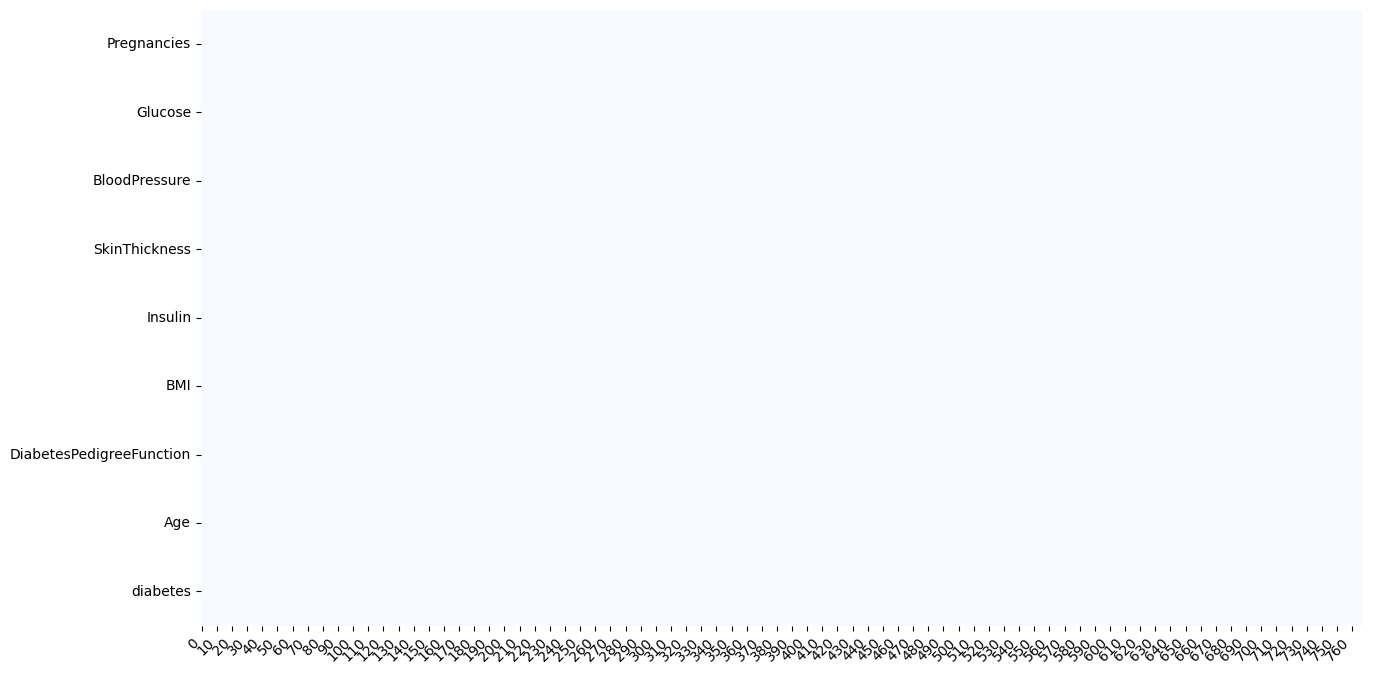

In [ ]:
plot_missing_value(df, return_df = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**CREATING X AND Y**

In [ ]:
X = df.iloc[:,0:8].values
Y = df.iloc[:,8].values

**CONVERT DataFrame INTO np array**

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
print(f'X: {X.shape}')

X: (768, 8)


In [ ]:
print(f'Y: {Y.shape}')

Y: (768,)


**IMPORTING train_test_split DARI MODULE sklearn**

In [ ]:
from sklearn.model_selection import train_test_split

**SPLIT THE DATA SET IN A TRAINING SET (90%) AND A TESTING SET (10%)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

**CONVERT ONE HOT TO CATEGORICAL DATA**

In [ ]:
Y_train = np_utils.to_categorical(Y_train,num_classes = 2)
Y_test = np_utils.to_categorical(Y_test,num_classes = 2)

In [ ]:
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of Y_train (691, 2)
Shape of Y_test (77, 2)


**FEATURE SCALING**

**IMPORTING StandardScaler DARI MODULE sklearn**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.64073703,  1.06850378,  0.24780543, ..., -0.3557498 ,
         1.13806722,  0.47594352],
       [ 0.04843029, -1.20025169,  0.87103945, ..., -0.3557498 ,
        -0.45291915,  0.05473838],
       [-0.84002981, -0.75289146,  0.04006075, ...,  0.76504362,
        -0.75465795, -0.28222573],
       ...,
       [ 0.04843029, -0.84875436, -0.2196201 , ..., -0.94161909,
        -0.96800861, -1.04039498],
       [ 2.12150386, -1.13634308,  0.24780543, ..., -0.25385949,
        -0.50473289,  0.13897941],
       [ 0.34458366,  0.49332633,  0.66329478, ..., -4.08748243,
         0.53154176,  3.00317435]])

In [ ]:
print(f'X_train: {X_train.shape}')

X_train: (691, 8)


In [ ]:
print(f'X_test: {X_test.shape}')

X_test: (77, 8)


In [ ]:
print(f'Y_train: {Y_train.shape}')

Y_train: (691, 2)


In [ ]:
print(f'Y_test: {Y_test.shape}')

Y_test: (77, 2)


**IMPORTING Sequential DARI MODULE tensorflow**

In [ ]:
from tensorflow.keras.models import Sequential

**IMPORTING Dense DARI MODULE tensorflow**

In [ ]:
from tensorflow.keras.layers import Dense

**BUILD ANN**

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(8,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,946
Trainable params: 4,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor ='val_accuracy', patience = 8, restore_best_weights = True)
history = model.fit(X_train, Y_train, epochs = 100, batch_size =64, validation_data = (X_test, Y_test), callbacks = [early_stopping])

Epoch 1/100
11/11 [==============================] - 2s 33ms/step - loss: 0.6766 - accuracy: 0.5760 - val_loss: 0.6376 - val_accuracy: 0.6494
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.6498 - val_loss: 0.5816 - val_accuracy: 0.6883
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.5611 - accuracy: 0.6946 - val_loss: 0.5316 - val_accuracy: 0.7792
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.5189 - accuracy: 0.7410 - val_loss: 0.4985 - val_accuracy: 0.7922
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4901 - accuracy: 0.7569 - val_loss: 0.4772 - val_accuracy: 0.8052
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4743 - accuracy: 0.7583 - val_loss: 0.4639 - val_accuracy: 0.8182
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.4646 - accuracy: 0.7627 - val_loss: 0.4537 - val_accuracy: 0.8442
Epoch 8/100


**LOSS & ACCURACY**

In [ ]:
loss, accuracy = model.evaluate(X_test,Y_test)
print('Accuracy Test Model ANN:%.2f' %(accuracy*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.4386 - accuracy: 0.8571
Accuracy Test Model ANN:85.71


**GRAFIK LOSS & VALIDATION**

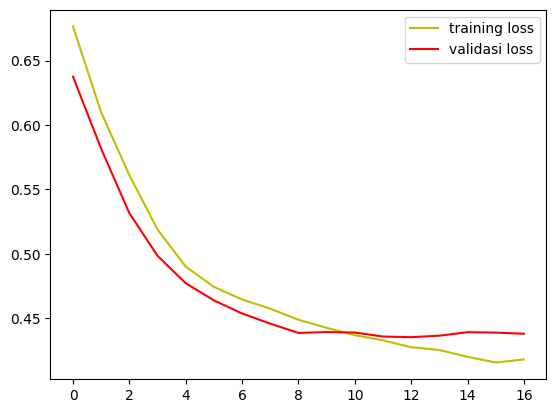

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss,'y', label = 'training loss')
plt.plot(val_loss,'r', label = 'validasi loss')
plt.legend()

**PREDICT & CLASSIFICATION REPORT**

In [ ]:
predict = model.predict(X_test)
print(classification_report(Y_test.argmax(axis = 1), predict.argmax(axis=1)))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.80      0.77      0.78        26

    accuracy                           0.86        77
   macro avg       0.84      0.84      0.84        77
weighted avg       0.86      0.86      0.86        77



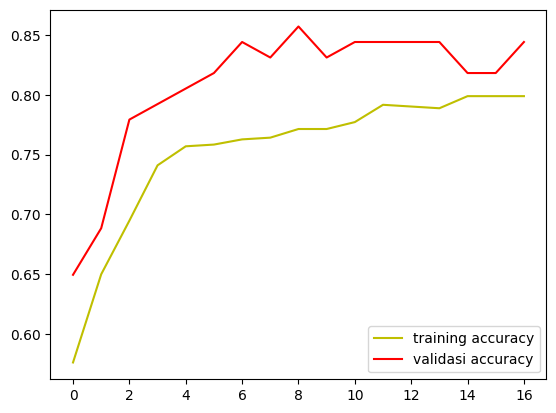

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc,'y', label = 'training accuracy')
plt.plot(val_acc,'r', label = 'validasi accuracy')
plt.legend()

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_test = np.argmax(Y_test,axis=1)
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.8571428571428571


**CONFUSION MATRIX**

In [ ]:
cm = confusion_matrix(Y_test.argmax(axis = 1), predict.argmax(axis = 1))
cm

array([[46,  5],
       [ 6, 20]])

**VISUALIZATION**

Text(0.5, 1.0, 'Confusion Matrix Model using ANN')

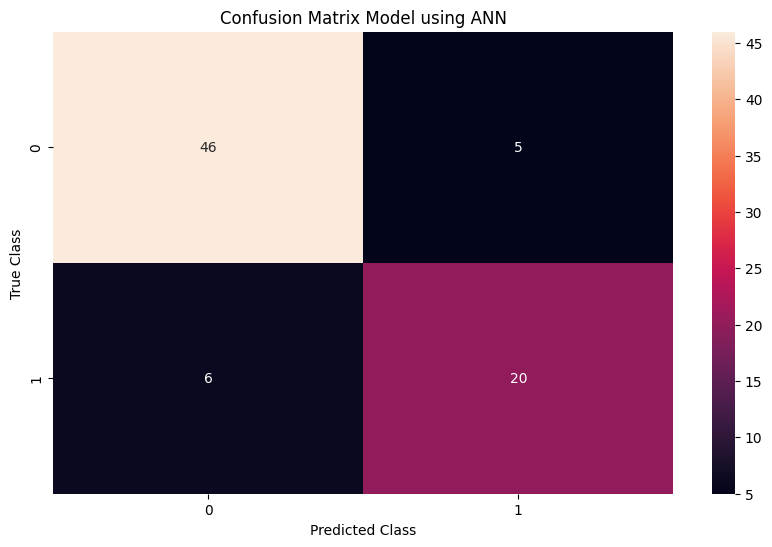

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model using ANN")